In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from collections import Counter
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load CSV files into separate DataFrames
db1 = pd.read_csv('caltech_clean.csv')
db2 = pd.read_csv('jpl_clean.csv')
db3 = pd.read_csv('office1_clean.csv')

# Combine them using concat
db = pd.concat([db1, db2], ignore_index=True)
db.head()

,Unnamed: 0,connectionTime,disconnectTime,kWhDelivered,siteID,spaceID,userID,userInputs/0/WhPerMile,userInputs/0/kWhRequested,userInputs/0/milesRequested,userInputs/0/minutesAvailable,userInputs/0/modifiedAt,userInputs/0/paymentRequired,userInputs/0/requestedDeparture
0,0,7.187222,15.451667,4.279,2,315,743.0,400.0,8.00,20.0,30.0,7.191944,1.0,7.687222
1,1,7.718056,23.609722,11.769,2,316,4269.0,400.0,16.00,40.0,60.0,7.865000,1.0,8.718056
2,2,7.867222,20.912778,0.889,2,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8.414444,19.320833,13.430,2,323,3853.0,360.0,21.60,60.0,559.0,8.418889,1.0,17.731111
4,4,8.984722,23.126944,12.001,2,492,1470.0,292.0,20.44,70.0,400.0,8.990556,1.0,15.651389


In [75]:
X = db[["connectionTime", "siteID", "spaceID"]].values
X

y = db['disconnectTime'].values
y

#splitting dataset into train, validation and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
train_linreg = LinearRegression().fit(X_train, y_train)

# Train a Neural Network (MLPClassifier)
train_nn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=0)
train_nn.fit(X_train, y_train)

# Predictions for Logistic Regression
pred_linreg = train_linreg.predict(X_val)
print("For Linear Regression: ")
print("Mean Squared Error (MSE):", mean_squared_error(y_val, pred_linreg))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, pred_linreg))
print("R² Score:", r2_score(y_val, pred_linreg))

# Predictions for Neural Network
pred_nn = train_nn.predict(X_val)
print("For Neural Network: ")
print("Mean Squared Error (MSE):", mean_squared_error(y_val, pred_nn))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, pred_nn))
print("R² Score:", r2_score(y_val, pred_nn))

For Linear Regression: 
Mean Squared Error (MSE): 85.93576798160235
Mean Absolute Error (MAE): 8.457287472445637
R² Score: 0.08938470473114746
For Neural Network: 
Mean Squared Error (MSE): 80.67797517185085
Mean Absolute Error (MAE): 7.949191890290486
R² Score: 0.14509871839934818


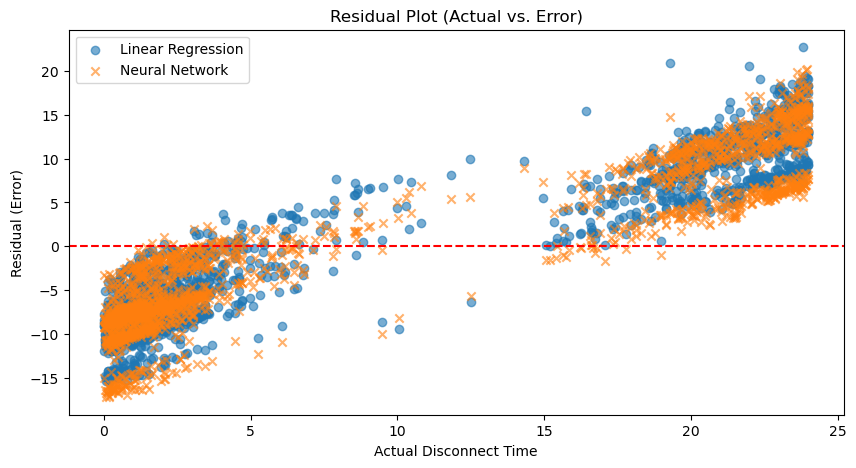

In [76]:
# Residuals (errors)
residuals_linreg = y_val - pred_linreg
residuals_nn = y_val - pred_nn

plt.figure(figsize=(10, 5))

plt.scatter(y_val, residuals_linreg, label="Linear Regression", alpha=0.6)
plt.scatter(y_val, residuals_nn, label="Neural Network", alpha=0.6, marker='x')

plt.axhline(y=0, color='red', linestyle='dashed')  # Perfect prediction line

plt.xlabel("Actual Disconnect Time")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot (Actual vs. Error)")
plt.legend()
plt.show()

In [77]:
db_cleaned = db.dropna()
db_cleaned.head()

,Unnamed: 0,connectionTime,disconnectTime,kWhDelivered,siteID,spaceID,userID,userInputs/0/WhPerMile,userInputs/0/kWhRequested,userInputs/0/milesRequested,userInputs/0/minutesAvailable,userInputs/0/modifiedAt,userInputs/0/paymentRequired,userInputs/0/requestedDeparture
0,0,7.187222,15.451667,4.279,2,315,743.0,400.0,8.00,20.0,30.0,7.191944,1.0,7.687222
1,1,7.718056,23.609722,11.769,2,316,4269.0,400.0,16.00,40.0,60.0,7.865000,1.0,8.718056
3,3,8.414444,19.320833,13.430,2,323,3853.0,360.0,21.60,60.0,559.0,8.418889,1.0,17.731111
4,4,8.984722,23.126944,12.001,2,492,1470.0,292.0,20.44,70.0,400.0,8.990556,1.0,15.651389
5,5,9.014167,1.164722,2.115,2,321,891.0,400.0,8.00,20.0,36.0,9.014722,1.0,9.614167


In [78]:
X2 = db_cleaned[["connectionTime", "siteID", "spaceID", "userID", "userInputs/0/WhPerMile", 
          "userInputs/0/kWhRequested", "userInputs/0/milesRequested", 
          "userInputs/0/minutesAvailable", "userInputs/0/modifiedAt", 
          "userInputs/0/paymentRequired", "userInputs/0/requestedDeparture"]].values
X2

y2 = db_cleaned['disconnectTime'].values
y2

#splitting dataset into train, validation and test data
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state = 0)
X2_train,X2_val,y2_train,y2_val = train_test_split(X2_train,y2_train,test_size=0.25,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_val = scaler.transform(X2_val)
X2_test = scaler.transform(X2_test)

# Train Logistic Regression model
train_linreg2 = LinearRegression().fit(X2_train, y2_train)

# Train a Neural Network (MLPClassifier)
train_nn2 = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=0)
train_nn2.fit(X2_train, y2_train)

# Predictions for Logistic Regression
pred_linreg2 = train_linreg2.predict(X2_val)
print("For Linear Regression: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_val, pred_linreg2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_val, pred_linreg2))
print("R² Score:", r2_score(y2_val, pred_linreg2))

# Predictions for Neural Network
pred_nn2 = train_nn2.predict(X2_val)
print("For Neural Network: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_val, pred_nn2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_val, pred_nn2))
print("R² Score:", r2_score(y2_val, pred_nn2))

For Linear Regression: 
Mean Squared Error (MSE): 80.47776397231017
Mean Absolute Error (MAE): 8.05539207409463
R² Score: 0.15631677344237138
For Neural Network: 
Mean Squared Error (MSE): 70.04501619612448
Mean Absolute Error (MAE): 6.902698900285131
R² Score: 0.26568778316255615


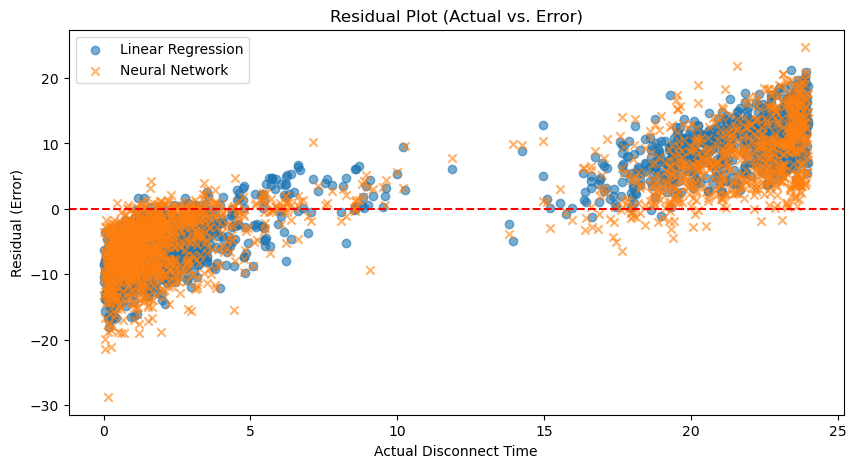

In [79]:
# Residuals (errors)
residuals_linreg2 = y2_val - pred_linreg2
residuals_nn2 = y2_val - pred_nn2

plt.figure(figsize=(10, 5))

plt.scatter(y2_val, residuals_linreg2, label="Linear Regression", alpha=0.6)
plt.scatter(y2_val, residuals_nn2, label="Neural Network", alpha=0.6, marker='x')

plt.axhline(y=0, color='red', linestyle='dashed')  # Perfect prediction line

plt.xlabel("Actual Disconnect Time")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot (Actual vs. Error)")
plt.legend()
plt.show()

In [80]:
X2 = db_cleaned[["connectionTime", "siteID", "spaceID", "userID", "userInputs/0/WhPerMile", 
          "userInputs/0/kWhRequested", "userInputs/0/milesRequested", 
          "userInputs/0/minutesAvailable", "userInputs/0/modifiedAt", 
          "userInputs/0/paymentRequired", "userInputs/0/requestedDeparture"]].values
X2

y2 = db_cleaned[['disconnectTime', 'kWhDelivered']].values
y2

#splitting dataset into train, validation and test data
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state = 0)
X2_train,X2_val,y2_train,y2_val = train_test_split(X2_train,y2_train,test_size=0.25,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_val = scaler.transform(X2_val)
X2_test = scaler.transform(X2_test)

# Train Logistic Regression model
train_linreg2 = LinearRegression().fit(X2_train, y2_train)

# Train a Neural Network (MLPClassifier)
#train_nn2 = MLPRegressor(hidden_layer_sizes=(200,200), activation='relu', max_iter=1000, random_state=0)
train_nn2 = MLPRegressor(hidden_layer_sizes=(200,),  # 3 layers: 500 → 250 → 100 neurons
                         activation='relu',                   # Use ReLU for non-linearity
                         solver='adam',                       # Adam optimizer for efficiency
                         alpha=0.0001,                        # L2 regularization (prevents overfitting)
                         max_iter=1000,                       # Increase iterations to ensure convergence
                         random_state=0)
train_nn2.fit(X2_train, y2_train)

# Predictions for Logistic Regression
pred_linreg2 = train_linreg2.predict(X2_val)
print("For Linear Regression: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_val, pred_linreg2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_val, pred_linreg2))
print("R² Score:", r2_score(y2_val, pred_linreg2))

# Predictions for Neural Network
pred_nn2 = train_nn2.predict(X2_val)
print("For Neural Network: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_val, pred_nn2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_val, pred_nn2))
print("R² Score:", r2_score(y2_val, pred_nn2))

For Linear Regression: 
Mean Squared Error (MSE): 67.34209293687431
Mean Absolute Error (MAE): 6.538152535723704
R² Score: 0.34084449808806266
For Neural Network: 
Mean Squared Error (MSE): 56.93734751652808
Mean Absolute Error (MAE): 5.623420964401774
R² Score: 0.4400597713096182


In [81]:
db_cleaned['Load'] = db_cleaned['kWhDelivered'] / (db_cleaned['disconnectTime'] - db_cleaned['connectionTime'])
db_cleaned.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_4984\2077419343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_cleaned['Load'] = db_cleaned['kWhDelivered'] / (db_cleaned['disconnectTime'] - db_cleaned['connectionTime'])


,Unnamed: 0,connectionTime,disconnectTime,kWhDelivered,siteID,spaceID,userID,userInputs/0/WhPerMile,userInputs/0/kWhRequested,userInputs/0/milesRequested,userInputs/0/minutesAvailable,userInputs/0/modifiedAt,userInputs/0/paymentRequired,userInputs/0/requestedDeparture,Load
0,0,7.187222,15.451667,4.279,2,315,743.0,400.0,8.00,20.0,30.0,7.191944,1.0,7.687222,0.517760
1,1,7.718056,23.609722,11.769,2,316,4269.0,400.0,16.00,40.0,60.0,7.865000,1.0,8.718056,0.740577
3,3,8.414444,19.320833,13.430,2,323,3853.0,360.0,21.60,60.0,559.0,8.418889,1.0,17.731111,1.231388
4,4,8.984722,23.126944,12.001,2,492,1470.0,292.0,20.44,70.0,400.0,8.990556,1.0,15.651389,0.848594
5,5,9.014167,1.164722,2.115,2,321,891.0,400.0,8.00,20.0,36.0,9.014722,1.0,9.614167,-0.269446


In [82]:
X2 = db_cleaned[["connectionTime", "siteID", "spaceID", "userID", "userInputs/0/WhPerMile", 
          "userInputs/0/kWhRequested", "userInputs/0/milesRequested", 
          "userInputs/0/minutesAvailable", "userInputs/0/modifiedAt", 
          "userInputs/0/paymentRequired", "userInputs/0/requestedDeparture"]].values
X2

y2 = db_cleaned[['disconnectTime', 'kWhDelivered', 'Load']].values
y2

#splitting dataset into train, validation and test data
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state = 0)
X2_train,X2_val,y2_train,y2_val = train_test_split(X2_train,y2_train,test_size=0.25,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_val = scaler.transform(X2_val)
X2_test = scaler.transform(X2_test)

# Train Logistic Regression model
train_linreg2 = LinearRegression().fit(X2_train, y2_train)

# Train a Neural Network (MLPClassifier)
#train_nn2 = MLPRegressor(hidden_layer_sizes=(200,200), activation='relu', max_iter=1000, random_state=0)
train_nn2 = MLPRegressor(hidden_layer_sizes=(200,),  # 3 layers: 500 → 250 → 100 neurons
                         activation='relu',                   # Use ReLU for non-linearity
                         solver='adam',                       # Adam optimizer for efficiency
                         alpha=0.0001,                        # L2 regularization (prevents overfitting)
                         max_iter=1000,                       # Increase iterations to ensure convergence
                         random_state=0)
train_nn2.fit(X2_train, y2_train)

# Predictions for Logistic Regression
pred_linreg2 = train_linreg2.predict(X2_val)
print("For Linear Regression: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_val, pred_linreg2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_val, pred_linreg2))
print("R² Score:", r2_score(y2_val, pred_linreg2))

# Predictions for Neural Network
pred_nn2 = train_nn2.predict(X2_val)
print("For Neural Network: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_val, pred_nn2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_val, pred_nn2))
print("R² Score:", r2_score(y2_val, pred_nn2))

For Linear Regression: 
Mean Squared Error (MSE): 73.5159906808019
Mean Absolute Error (MAE): 4.900873116910648
R² Score: 0.23043652229894232
For Neural Network: 
Mean Squared Error (MSE): 66.32820427130468
Mean Absolute Error (MAE): 4.2612525151654665
R² Score: 0.29837146087347804


In [99]:
X_final = db_cleaned[["connectionTime", "siteID", "spaceID", 
                    "userID", "userInputs/0/WhPerMile", "userInputs/0/kWhRequested", "userInputs/0/milesRequested", 
                    "userInputs/0/minutesAvailable", "userInputs/0/modifiedAt", "userInputs/0/paymentRequired", 
                    "userInputs/0/requestedDeparture"]].values


y_final = db_cleaned[['disconnectTime', 'kWhDelivered']].values


#splitting dataset into train, validation and test data
X_final_train,X_final_test,y_final_train,y_final_test = train_test_split(X_final,y_final,test_size=0.2,random_state = 0)
X_final_train,X_final_val,y_final_train,y_final_val = train_test_split(X_final_train,y_final_train,test_size=0.25,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X_final_train)
X_final_train = scaler.transform(X_final_train)
X_final_val = scaler.transform(X_final_val)
X_final_test = scaler.transform(X_final_test)

# Scale target variables as well (standardization of outputs)
y_scaler = StandardScaler().fit(y_final_train)
y_final_train = y_scaler.transform(y_final_train)
y_final_val = y_scaler.transform(y_final_val)
y_final_test = y_scaler.transform(y_final_test)

# Train Logistic Regression model
train_linreg_final = LinearRegression().fit(X_final_train, y_final_train)

# Train a Neural Network (MLPClassifier)
#train_nn2 = MLPRegressor(hidden_layer_sizes=(200,200), activation='relu', max_iter=1000, random_state=0)
train_nn_final = MLPRegressor(hidden_layer_sizes=(200,),  # 3 layers: 500 → 250 → 100 neurons
                         activation='relu',                   # Use ReLU for non-linearity
                         solver='adam',                       # Adam optimizer for efficiency
                         alpha=0.0001,                        # L2 regularization (prevents overfitting)
                         max_iter=1000,                       # Increase iterations to ensure convergence
                         random_state=0)
train_nn_final.fit(X_final_train, y_final_train)

# Predictions for Logistic Regression
pred_linreg_final = train_linreg_final.predict(X_final_val)
print("For Linear Regression: ")
print("Mean Squared Error (MSE):", mean_squared_error(y_final_val, pred_linreg_final))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_final_val, pred_linreg_final))
print("R² Score:", r2_score(y_final_val, pred_linreg_final))

# Predictions for Neural Network
pred_nn_final = train_nn_final.predict(X_final_val)
print("For Neural Network: ")
print("Mean Squared Error (MSE):", mean_squared_error(y_final_val, pred_nn_final))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_final_val, pred_nn_final))
print("R² Score:", r2_score(y_final_val, pred_nn_final))

For Linear Regression: 
Mean Squared Error (MSE): 0.6563449898805175
Mean Absolute Error (MAE): 0.6456790832439051
R² Score: 0.34084449808806294
For Neural Network: 
Mean Squared Error (MSE): 0.5476587754009625
Mean Absolute Error (MAE): 0.5521990626320875
R² Score: 0.45119007340356065


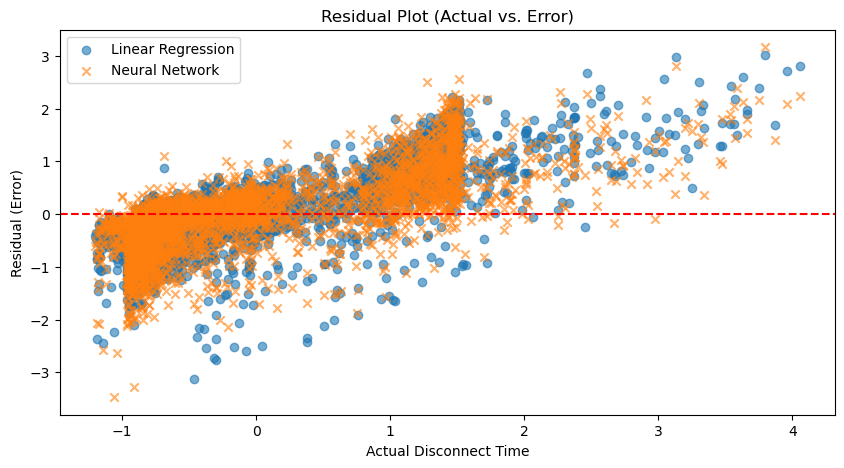

In [100]:
# Residuals (errors)
residuals_linreg_final = y_final_val - pred_linreg_final
residuals_nn_final = y_final_val - pred_nn_final

plt.figure(figsize=(10, 5))

plt.scatter(y_final_val, residuals_linreg_final, label="Linear Regression", alpha=0.6)
plt.scatter(y_final_val, residuals_nn_final, label="Neural Network", alpha=0.6, marker='x')

plt.axhline(y=0, color='red', linestyle='dashed')  # Perfect prediction line

plt.xlabel("Actual Disconnect Time")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot (Actual vs. Error)")
plt.legend()
plt.show()

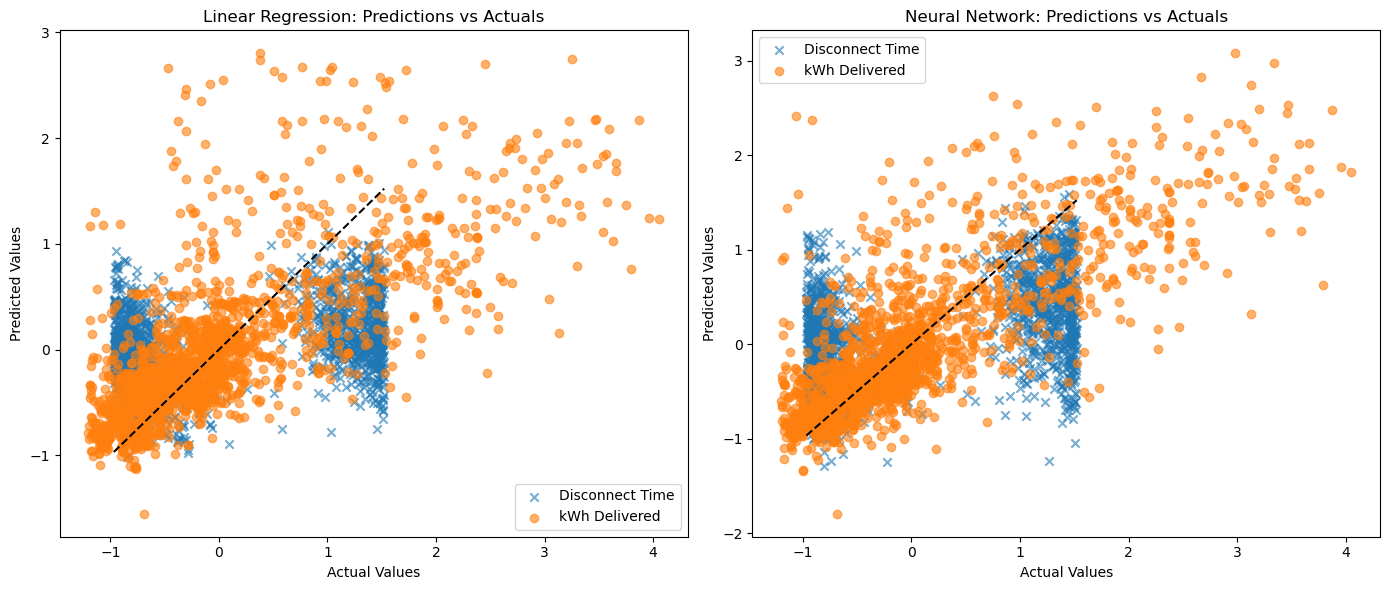

In [101]:
# Plot Predictions vs Actuals for Linear Regression
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_final_val[:, 0], pred_linreg_final[:, 0], label='Disconnect Time', alpha=0.6, marker='x')
plt.scatter(y_final_val[:, 1], pred_linreg_final[:, 1], label='kWh Delivered', alpha=0.6)
plt.plot([min(y_final_val[:, 0]), max(y_final_val[:, 0])], [min(y_final_val[:, 0]), max(y_final_val[:, 0])], color='black', linestyle='--')
plt.title('Linear Regression: Predictions vs Actuals')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plot Predictions vs Actuals for Neural Network
plt.subplot(1, 2, 2)
plt.scatter(y_final_val[:, 0], pred_nn_final[:, 0], label='Disconnect Time', alpha=0.6, marker='x')
plt.scatter(y_final_val[:, 1], pred_nn_final[:, 1], label='kWh Delivered', alpha=0.6)
plt.plot([min(y_final_val[:, 0]), max(y_final_val[:, 0])], [min(y_final_val[:, 0]), max(y_final_val[:, 0])], color='black', linestyle='--')
plt.title('Neural Network: Predictions vs Actuals')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

Training Neural Network with layers: (10,)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 47.291883407430795, MAE: 4.69705204826551, R²: 0.5859154558252129

Training Neural Network with layers: (50,)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 44.93334715762271, MAE: 4.475289498278657, R²: 0.6065666402897343

Training Neural Network with layers: (100,)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 41.568188263015564, MAE: 4.3209223109562735, R²: 0.6360317447970794

Training Neural Network with layers: (200,)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 42.0926959590702, MAE: 4.29999152677224, R²: 0.6314391907563406

Training Neural Network with layers: (10, 10)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 43.13457152114364, MAE: 4.494639268879059, R²: 0.6223165985455121

Training Neural Network with layers: (50, 50)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 45.20479362527665, MAE: 4.422350279710621, R²: 0.6041898733113933

Training Neural Network with layers: (100, 100)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 44.85660299129383, MAE: 4.3351277101971, R²: 0.6072386070384168

Training Neural Network with layers: (200, 200)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 44.1761137774533, MAE: 4.368377222172243, R²: 0.6131969247374904

Training Neural Network with layers: (10, 10, 10)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 44.87786432679613, MAE: 4.511609185751481, R²: 0.6070524442175336

Training Neural Network with layers: (50, 50, 50)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 48.35871333465823, MAE: 4.354721772485462, R²: 0.5765743648747395

Training Neural Network with layers: (100, 100, 100)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 45.173482604642984, MAE: 4.181584516034765, R²: 0.6044640304980511

Training Neural Network with layers: (200, 200, 200)


c:\Users\chris\anaconda3\envs\ME44312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 49.04098621369627, MAE: 4.249822789333993, R²: 0.5706004295233955



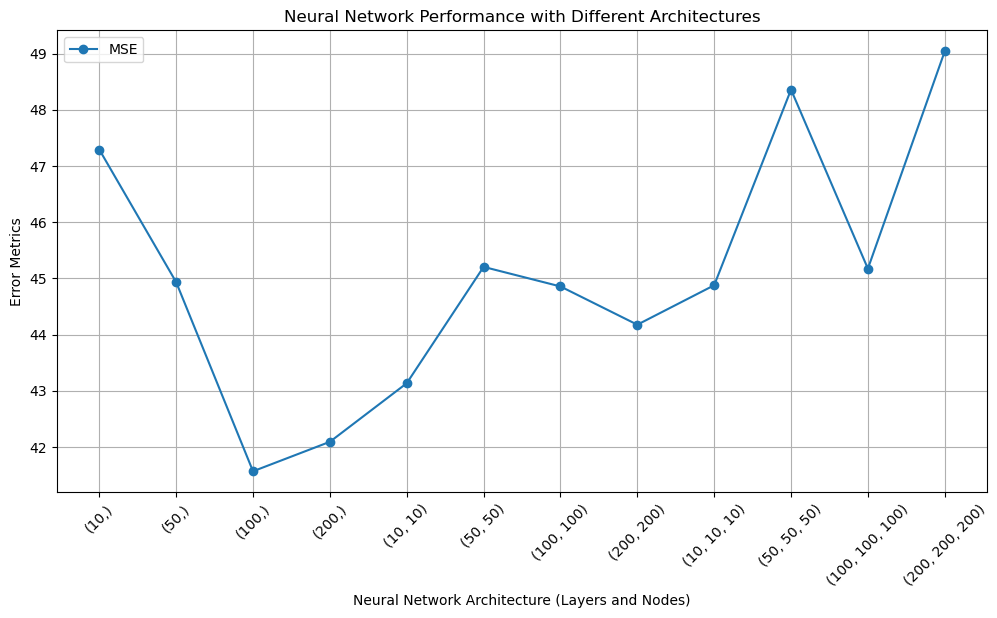

In [83]:
# Define input and output
X2 = db_cleaned[["connectionTime", "siteID", "spaceID", "userID", "userInputs/0/WhPerMile",  
          "userInputs/0/kWhRequested", "userInputs/0/milesRequested", 
          "userInputs/0/minutesAvailable", "userInputs/0/modifiedAt", 
          "userInputs/0/paymentRequired", "userInputs/0/requestedDeparture"]].values
y2 = db_cleaned[['kWhDelivered']].values

# Split dataset into train, validation, and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.25, random_state=0)

# Scale data
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_val = scaler.transform(X2_val)
X2_test = scaler.transform(X2_test)

# Define layer and neuron configurations to test
layer_configs = [(10,), (50,), (100,), (200,), (10, 10), (50, 50), (100, 100), (200, 200), (10, 10, 10), (50, 50, 50), (100, 100, 100), (200, 200, 200)]
#layer_configs = [(10,10,10), (50,50,50), (100,100,100)]
results = []

for layers in layer_configs:
    print(f"Training Neural Network with layers: {layers}")
    train_nn2 = MLPRegressor(hidden_layer_sizes=layers,
                             activation='relu',
                             solver='adam',
                             alpha=0.0001,
                             max_iter=1000,
                             random_state=0)
    train_nn2.fit(X2_train, y2_train)
    
    pred_nn2 = train_nn2.predict(X2_val)
    mse = mean_squared_error(y2_val, pred_nn2)
    mae = mean_absolute_error(y2_val, pred_nn2)
    r2 = r2_score(y2_val, pred_nn2)
    
    results.append((layers, mse, mae, r2))
    print(f"MSE: {mse}, MAE: {mae}, R²: {r2}\n")

# Convert results into separate lists for plotting
layers_labels = [str(l) for l, _, _, _ in results]
mse_values = [mse for _, mse, _, _ in results]
mae_values = [mae for _, _, mae, _ in results]
r2_values = [r2 for _, _, _, r2 in results]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(layers_labels, mse_values, marker='o', label='MSE')
#plt.plot(layers_labels, mae_values, marker='s', label='MAE')
#plt.plot(layers_labels, r2_values, marker='^', label='R² Score')
plt.xticks(rotation=45)
plt.xlabel("Neural Network Architecture (Layers and Nodes)")
plt.ylabel("Error Metrics")
plt.legend()
plt.title("Neural Network Performance with Different Architectures")
plt.grid()
plt.show()